# Stock Price Prediction utilizing Analyst Ratings

Travis Royce
https://github.com/tmcroyce

### Business Understanding
This machine learning model will predict if a stock is likely to increase or decrease in price based on the analyst ratings. The model will be trained on the data from the Koyfin website. The data will be downloaded, not scraped, but using selenium and beautiful soup to automate the downloading process to make it less arduous. 

The end model will predict 5-day stock movement based primarily on analyst ratings and the changing of those ratings. 


### Stakeholders
The stakeholders are any financial firm or individual investor who is interested in taking short-term positions in stocks. The model will be used to predict if a stock is likely to increase or decrease in price over the next five days (one business week), based primarily on analyst ratings and the changing of those ratings.


### Evaluation Metrics

As I want an equal balance between false positives and negatives, I will use the F1 score as my evaluation metric. The F1 score is the harmonic mean of precision and recall.


### Data Understanding
The initial data includes the following features for each stock:
- Ticker
- Date
- Analyst Price Target (avg)
- Analyst Price Target (High)
- Analyst Price Target (Low)
- Analyst Price Target (StDev)
- Analyst Price Target (Median)
- Open Price
- Close Price
- Volume
- High Price
- Low Price
- Analyst average Rating
- Count of Price Targets from Analysts


#### Data Preparation
The data was aggregated by date, cleaned, and prepared for modeling. 
While at first I looked at each stock's data individually, the purpose was to look at the general effects of analyst ratings on stock price. Therefore, I aggregated the data by date, and just have ticker as a single feature. 

- Price vs Target Features
    -   Is stock price above min price target?
    -   Is stock price below max price target?
    -   Is stock price above mean price target?
    -   Is stock price below mean price target?
    -   Is stock price both above min price target and below max price target?
- Running Correlations (1, 3, 6 months) of stock price and analyst ratings
- Return Features
    -   One-day return (stock price change)
    -   Three-day return (stock price change)
    -   Five-day return (stock price change)
    -   Ten-day return (stock price change)
    -   Twenty-day return (stock price change)
    -   Thirty-day return (stock price change)
    -   Sixty-day return (stock price change)
- Average Analyst Rating Change (1, 3, 6 months)
- Average Analyst Price Target Change (1, 3, 6 months)
- Max Analyst Rating Change (1, 3, 6 months)
- Max Analyst Price Target Change (1, 3, 6 months)


#### Modeling
I utilized a variety of different models to train and test the data. The models I used included:
- Logistic Regression
- Random Forest
- XGBoost
- Support Vector Machine
- K-Nearest Neighbors
- Naive Bayes
- Decision Tree
- Extra Trees


#### Deployment

Future development: Like the rest of my apps, to be deployed via streamlit applicaiton.


## Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import sqlite3
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import requests   
import shutil      
import datetime
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import os
import winsound
os.chdir('C:\\Users\\Travis\\OneDrive\\Data Science\\Personal_Projects\\Finance\\analyst_price_target_preciction')
import warnings
warnings.filterwarnings('ignore')
from selenium.common.exceptions import WebDriverException
import statsmodels as sm
#import percentformatter
from matplotlib.ticker import PercentFormatter
# import plotly
import plotly.express as px
import xgboost
from xgboost import XGBClassifier
from random import randint
import  random
from cmath import nan
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import make_column_selector as selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
import pickle
from sklearn.metrics import fbeta_score
import winsound
from sklearn.linear_model import LinearRegression
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, f1_score, make_scorer, recall_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import winsound

In [3]:
home  = 'C:\\Users\\Travis\\OneDrive\\Data Science\\Personal_Projects\\Finance\\analyst_price_target_preciction'
sound_file = "data/audio/Jobs Done.wav"

In [4]:
def play_jobs_done():
    winsound.PlaySound(sound_file, winsound.SND_FILENAME)

In [5]:
# mark data folder
data_folder = 'C:\\Users\\Travis\\OneDrive\\Data Science\\Personal_Projects\\Finance\\Analyst_Price_Target_Preciction\\data'
# today
today = datetime.date.today()
today = today.strftime('%Y-%m-%d')

In [6]:
# get list of sp100 tickers
sp100 = pd.read_html('https://en.wikipedia.org/wiki/S%26P_100')[2]
#sp100 = sp100['Symbol'].tolist()
sp100.head()

,Symbol,Name,Sector
0,AAPL,Apple,Information Technology
1,ABBV,AbbVie,Health Care
2,ABT,Abbott,Health Care
3,ACN,Accenture,Information Technology
4,ADBE,Adobe,Information Technology


In [7]:
sp100_tickers = sp100['Symbol'].tolist()

Auto login to koyfin, which I am using to download the data.

If you need to grab the data, run below (with your own credentials)

Get to the price target page and show table. Now, we can download the data with some automation.

## If Data Needed! (Hide if not)

In [8]:
def download_analyst_ratings2(ticker):
    
    # click search bar
    searchbar_xpath = '//*[@id="root"]/div[1]/section/div[1]/div[1]/div[2]/div/div[2]'
    searchbar = driver.find_element_by_xpath(searchbar_xpath)
    searchbar.click()
    # wait 2 seconds
    time.sleep(2)

    search_click = '/html/body/div[2]/div/div[2]/div/div[2]/div/div/div[2]/input'
    searchbar = driver.find_element_by_xpath(search_click)
    searchbar.click()
    # add ticker from sp500 list
    searchbar.send_keys(ticker)
    time.sleep(2)

    searchbar.send_keys(Keys.RETURN)
    searchbar.send_keys(Keys.ENTER)
    # wait 2 seconds
    time.sleep(3)

    download_table_xpath = '//*[@id="root"]/div[1]/section/div[2]/div[2]/div[1]/div[1]/div[2]/div/div/div/div[3]/div/div[2]/button'
    download_table = driver.find_element_by_xpath(download_table_xpath)
    download_table.click()


In [9]:
# if you need to load the most recent data
recent_folder = os.listdir(data_folder + f'/aggregates/')
recent_clean = [n for n in recent_folder if 'clean' in n]
if recent_clean == []:
    init_url = 'https://app.koyfin.com/login'
    driver = None
    if driver == None:
        driver = webdriver.Chrome()
    driver.get(init_url)
    time.sleep(5)
    username_xpath = '//*[@id="root"]/div[1]/div/div[2]/div/form/div[2]/div[1]/div/div[2]/input'
    username = driver.find_element_by_xpath(username_xpath)
    # add your username
    username.send_keys(os.environ.get('PRIMARY_EMAIL'))
    password_xpath = '//*[@id="root"]/div[1]/div/div[2]/div/form/div[2]/div[2]/div/div[2]/input'
    password = driver.find_element_by_xpath(password_xpath)
    # add your password
    password.send_keys(os.environ.get('Koyfin_Pword'))

    # click login button
    login_xpath = '//*[@id="root"]/div[1]/div/div[2]/div/form/div[3]/button/label'
    login = driver.find_element_by_xpath(login_xpath)
    login.click()
    # wait 5 seconds
    time.sleep(5)

    # dl analyst ratings
    for ticker in sp100_tickers:
        download_analyst_ratings2(ticker)
        time.sleep(4)

    # wait 5 seconds

    #Now, need to load all downloaded csvs and name them by company. 
    downloads_folder = '/Users/Travis/Downloads'
    os.chdir(downloads_folder)

    # get the list of files and when they were downloaded
    files = os.listdir(downloads_folder)
    files.sort(key=os.path.getmtime)
    # get the most recent file
    newest_file = files[-1]
    print(f'newest file is {newest_file}')

    # get list of most recent files in downloads folder
    files = os.listdir(downloads_folder)
    files.sort(key=os.path.getmtime)
    newest_files = files[-(len(sp100_tickers)):]
    print(f'newest files are {newest_files}')

    today = datetime.date.today()
    today = today.strftime('%Y-%m-%d')

    for file in newest_files:
        df = pd.read_csv(file)
        try: 
            col_3 = df.columns[3]
            ticker = col_3.split(' ')[0]
            df['Ticker'] = ticker
            # save to csv
            df.to_csv(data_folder+ f'/{today}_{ticker}.csv', index=False)
        except:
            print(f'error with {file}, ticker unknown')
            pass

    # check len of files in data folder
    data_files = os.listdir(data_folder)
    print(f'number of files in data folder is {len(data_files)}')
    # open first
    df = pd.read_csv(newest_files[0])

    #Merge the files into one dataframe and save to csv
    files = os.listdir(data_folder)

    # merge all files by date into one dataframe
    df = pd.read_csv(data_folder + f'/{files[0]}')
    df.rename(columns={' Date':'Date'}, inplace=True)

    for file in files[1:]:
        if 'csv' in file:
            df_temp = pd.read_csv(data_folder + f'/{file}')
            if ' Date' in df_temp.columns:
                df_temp['Date'] = df_temp[' Date']
                # left merge
                df = pd.merge(df, df_temp, how='left', on=['Date'])
                print(f'file {file} merged')
            else:
                print(f'file {file} not merged')

    # save to csv
    df.to_csv(data_folder + f'/aggregates/all_data_' + today + '.csv', index=False)

    # drop all Date_x and Date_y columns
    df = df.loc[:,~df.columns.str.contains('_x')]
    df = df.loc[:,~df.columns.str.contains('_y')]

    # round all columns to 2 decimal places
    df = df.round(2)
    df.to_csv(data_folder + f'/aggregates/all_data_clean' + today + '.csv', index=False)
    df

## Initial EDA

In [10]:
# if you need to load the most recent data
recent_folder = os.listdir(data_folder + f'/aggregates/')
recent_clean = [n for n in recent_folder if 'clean' in n]
recent_clean

['all_data_clean2023-02-06.csv']

In [11]:
df = pd.read_csv(data_folder + f'/aggregates/' + recent_clean[0])
df.head()

,Date,AAPL Price Target,AAPL Price Target - High,AAPL Price Target - Low,AAPL Price Target - StdDev,AAPL Price Target - Median,AAPL Open,AAPL Low,AAPL High,AAPL Close,...,XOM Price Target - Low,XOM Price Target - StdDev,XOM Price Target - Median,XOM Open,XOM Low,XOM High,XOM Close,XOM Adj. Close,XOM Rating,XOM Price Target - #
0,02-05-2013,22.12,31.71,9.64,3.9,21.43,13.64,13.58,14.12,16.35,...,85.0,5.09,96.0,58.85,58.55,59.05,89.74,58.76,3.65,19
1,02-06-2013,22.12,31.71,9.64,3.9,21.43,14.02,13.90,14.33,16.33,...,85.0,5.09,96.0,58.52,56.69,58.86,89.79,58.79,3.65,19
2,02-07-2013,22.12,31.71,9.64,3.9,21.43,14.31,14.03,14.52,16.72,...,85.0,5.09,96.0,58.78,57.73,58.79,88.25,58.15,3.65,19
3,02-08-2013,22.12,31.71,9.64,3.9,21.43,14.64,14.47,14.79,16.96,...,85.0,5.09,96.0,58.32,58.06,58.51,88.61,58.39,3.65,19
4,02-11-2013,22.12,31.71,9.64,3.9,21.43,14.72,14.62,14.98,17.14,...,85.0,5.09,96.0,58.22,57.97,58.32,88.28,58.17,3.65,19


In [12]:

# plot aapl columns
aapl_cols = [col for col in df.columns if 'AAPL' in col]
aapl_cols = aapl_cols + ['Date']
df_aapl = df[aapl_cols]
# plot aapl columns with plotly
fig = px.line(df_aapl, x='Date', y=aapl_cols[1:], title='AAPL Price Targets')
fig.show()



In [13]:

# plot same chart but exponential
fig = px.line(df_aapl, x='Date', y=aapl_cols[1:], title='AAPL Price Targets (log chart)', log_y=True)
fig.show()

In [14]:
# plot correlation of Price Target - Median and Close
fig = px.scatter(df, x='AAPL Price Target - Median', y='AAPL Close', title='Price Target - Median vs Close')
# add trendline
fig.add_traces(px.scatter(df, x='AAPL Price Target - Median', y='AAPL Close', trendline='ols').data[1])
# add correlation coefficient
fig.update_layout(
    annotations=[
        dict(
            x=0.5,
            y=0.8,
            xref='paper',
            yref='paper',
            text=f'Correlation Coefficient: {df["AAPL Price Target - Median"].corr(df["AAPL Close"]):.2f}',
            showarrow=False
        )
    ]
)

fig.show()

I have lots of features I want to add before I continue EDA, so lets do that first.

### Feature Additions


Feature additions:
- Price vs Target Features
    -   Is stock price above min price target?
    -   Is stock price below max price target?
    -   Is stock price above mean price target?
    -   Is stock price below mean price target?
    -   Is stock price both above min price target and below max price target?
- Running Correlations (1, 3, 6, 12, 24 months) of stock price and analyst ratings
- Return Features
    -   One-day return (stock price change)
    -   Three-day return (stock price change)
    -   Five-day return (stock price change)
    -   Ten-day return (stock price change)
    -   Twenty-day return (stock price change)
    -   Thirty-day return (stock price change)
    -   Sixty-day return (stock price change)
    -   One-hundred-day return (stock price change)
- Average Analyst Rating Change (1, 3, 6, 12 months)
- Average Analyst Price Target Change (1, 3, 6, 12 months)
- Max Analyst Rating Change (1, 3, 6, 12 months)
- Max Analyst Price Target Change (1, 3, 6, 12 months)


Might make sense to go date -> ticker -> price target data -> analyst rating data -> stock price data, and do it by date, so we would have a row for each company on each date, and the company would still be trained. 

In [15]:
# open first
folder = 'C:\\Users\\Travis\\OneDrive\\Data Science\\Personal_Projects\\Finance\\Analyst_Price_Target_Preciction\\data'
files = os.listdir(folder)
# if csv in file
files = [file for file in files if 'csv' in file]
df = pd.read_csv(folder + f'/{files[0]}')
df.head()

,Date,AAPL Price Target,AAPL Price Target - High,AAPL Price Target - Low,AAPL Price Target - StdDev,AAPL Price Target - Median,AAPL Open,AAPL Low,AAPL High,AAPL Close,AAPL Adj. Close,AAPL Rating,AAPL Price Target - #,Ticker
0,02-05-2013,22.125,31.71429,9.64286,3.90159,21.42857,13.638486,13.582279,14.120386,16.351571,14.062153,4.12281,46,AAPL
1,02-06-2013,22.125,31.71429,9.64286,3.90159,21.42857,14.019952,13.900475,14.328012,16.333928,14.046980,4.12281,46,AAPL
2,02-07-2013,22.125,31.71429,9.64286,3.90159,21.42857,14.311114,14.029062,14.519641,16.722142,14.464651,4.12281,46,AAPL
3,02-08-2013,22.125,31.71429,9.64286,3.90159,21.42857,14.643212,14.465578,14.791807,16.963571,14.673487,4.12281,46,AAPL
4,02-11-2013,22.125,31.71429,9.64286,3.90159,21.42857,14.720444,14.620042,14.981180,17.140357,14.826407,4.12281,46,AAPL


In [16]:
ticker = df['Ticker'][0]
ticker_cols = [col for col in df.columns if ticker in col]
ticker_cols

['AAPL Price Target',
 'AAPL Price Target - High',
 'AAPL Price Target - Low',
 'AAPL Price Target - StdDev',
 'AAPL Price Target - Median',
 'AAPL Open',
 'AAPL Low',
 'AAPL High',
 'AAPL Close',
 'AAPL Adj. Close',
 'AAPL Rating',
 'AAPL Price Target - #']

In [17]:
new_ticker_cols = [col.replace(ticker+' ', '') for col in ticker_cols]
new_ticker_cols

['Price Target',
 'Price Target - High',
 'Price Target - Low',
 'Price Target - StdDev',
 'Price Target - Median',
 'Open',
 'Low',
 'High',
 'Close',
 'Adj. Close',
 'Rating',
 'Price Target - #']

In [18]:
df.rename(columns=dict(zip(ticker_cols, new_ticker_cols)), inplace=True)
df.head()

,Date,Price Target,Price Target - High,Price Target - Low,Price Target - StdDev,Price Target - Median,Open,Low,High,Close,Adj. Close,Rating,Price Target - #,Ticker
0,02-05-2013,22.125,31.71429,9.64286,3.90159,21.42857,13.638486,13.582279,14.120386,16.351571,14.062153,4.12281,46,AAPL
1,02-06-2013,22.125,31.71429,9.64286,3.90159,21.42857,14.019952,13.900475,14.328012,16.333928,14.046980,4.12281,46,AAPL
2,02-07-2013,22.125,31.71429,9.64286,3.90159,21.42857,14.311114,14.029062,14.519641,16.722142,14.464651,4.12281,46,AAPL
3,02-08-2013,22.125,31.71429,9.64286,3.90159,21.42857,14.643212,14.465578,14.791807,16.963571,14.673487,4.12281,46,AAPL
4,02-11-2013,22.125,31.71429,9.64286,3.90159,21.42857,14.720444,14.620042,14.981180,17.140357,14.826407,4.12281,46,AAPL


In [19]:
# add correlations
folder = 'C:\\Users\\Travis\\OneDrive\\Data Science\\Personal_Projects\\Finance\\Analyst_Price_Target_Preciction\\data'
files = os.listdir(folder)


for file in files:
    if 'csv' in file:
        df = pd.read_csv(folder + f'/{file}')
        ticker = df['Ticker'][0]
        ticker_cols = [col for col in df.columns if ticker in col]
        new_ticker_cols = [col.replace(ticker+' ', '') for col in ticker_cols]
        df.rename(columns=dict(zip(ticker_cols, new_ticker_cols)), inplace=True)
        # save to csv
        df.to_csv(folder + f'/correlations/{file}', index=False)


Check the features

In [20]:
df.columns

Index([' Date', 'Price Target', 'Price Target - High', 'Price Target - Low',
       'Price Target - StdDev', 'Price Target - Median', 'Open', 'Low', 'High',
       'Close', 'Adj. Close', 'Rating', 'Price Target - #', 'Ticker'],
      dtype='object')

In [21]:
folder = 'C:\\Users\\Travis\\OneDrive\\Data Science\\Personal_Projects\\Finance\\Analyst_Price_Target_Preciction\\data\\correlations'
files = os.listdir(folder)
files = [file for file in files if 'csv' in file]
# open first file
df = pd.read_csv(folder + f'/{files[0]}')
df.head()

,Date,Price Target,Price Target - High,Price Target - Low,Price Target - StdDev,Price Target - Median,Open,Low,High,Close,Adj. Close,Rating,Price Target - #,Ticker
0,02-05-2013,22.125,31.71429,9.64286,3.90159,21.42857,13.638486,13.582279,14.120386,16.351571,14.062153,4.12281,46,AAPL
1,02-06-2013,22.125,31.71429,9.64286,3.90159,21.42857,14.019952,13.900475,14.328012,16.333928,14.046980,4.12281,46,AAPL
2,02-07-2013,22.125,31.71429,9.64286,3.90159,21.42857,14.311114,14.029062,14.519641,16.722142,14.464651,4.12281,46,AAPL
3,02-08-2013,22.125,31.71429,9.64286,3.90159,21.42857,14.643212,14.465578,14.791807,16.963571,14.673487,4.12281,46,AAPL
4,02-11-2013,22.125,31.71429,9.64286,3.90159,21.42857,14.720444,14.620042,14.981180,17.140357,14.826407,4.12281,46,AAPL


In [22]:

for file in files:
    # open file
    df = pd.read_csv(folder + f'/{file}')
    # calc 15-day correlation
    try:
        df['15-day Correlation'] = df['Price Target'].rolling(15).corr(df['Close'])
        # calc 30-day correlation
        df['30-day Correlation'] = df['Price Target'].rolling(30).corr(df['Close'])
        # calc 60-day correlation
        df['60-day Correlation'] = df['Price Target'].rolling(60).corr(df['Close'])
        # 90-day correlation
        df['90-day Correlation'] = df['Price Target'].rolling(90).corr(df['Close'])
        # one day close change
        df['1-day Close Change'] = df['Close'].pct_change(1)
        # two day close change
        df['2-day Close Change'] = df['Close'].pct_change(2)
        # three day close change
        df['3-day Close Change'] = df['Close'].pct_change(3)
        # five day close change
        df['5-day Close Change'] = df['Close'].pct_change(5)
        # ten day close change
        df['10-day Close Change'] = df['Close'].pct_change(10)
        # twenty day close change
        df['20-day Close Change'] = df['Close'].pct_change(20)
        # thirty day close change
        df['30-day Close Change'] = df['Close'].pct_change(30)
        # sixty day close change
        df['60-day Close Change'] = df['Close'].pct_change(60)
        # 180-day close change
        df['180-day Close Change'] = df['Close'].pct_change(180)
        # 1-day Price Target - High change
        df['1-day Price Target - High Change'] = df['Price Target - High'].pct_change(1)
        # 2-day Price Target - High change
        df['2-day Price Target - High Change'] = df['Price Target - High'].pct_change(2)
        # 3-day Price Target - High change
        df['3-day Price Target - High Change'] = df['Price Target - High'].pct_change(3)
        # 5-day Price Target - High change
        df['5-day Price Target - High Change'] = df['Price Target - High'].pct_change(5)
        # 10-day Price Target - High change
        df['10-day Price Target - High Change'] = df['Price Target - High'].pct_change(10)
        # 20-day Price Target - High change
        df['20-day Price Target - High Change'] = df['Price Target - High'].pct_change(20)
        # 30-day Price Target - High change
        df['30-day Price Target - High Change'] = df['Price Target - High'].pct_change(30)
        # 1-day Price Target - Low change
        df['1-day Price Target - Low Change'] = df['Price Target - Low'].pct_change(1)
        # 2-day Price Target - Low change
        df['2-day Price Target - Low Change'] = df['Price Target - Low'].pct_change(2)
        # 3-day Price Target - Low change
        df['3-day Price Target - Low Change'] = df['Price Target - Low'].pct_change(3)
        # 5-day Price Target - Low change
        df['5-day Price Target - Low Change'] = df['Price Target - Low'].pct_change(5)
        # 10-day Price Target - Low change
        df['10-day Price Target - Low Change'] = df['Price Target - Low'].pct_change(10)
        # 20-day Price Target - Low change
        df['20-day Price Target - Low Change'] = df['Price Target - Low'].pct_change(20)
        # 30-day Price Target - Low change
        df['30-day Price Target - Low Change'] = df['Price Target - Low'].pct_change(30)
        # 1-day Price Target - # change
        df['1-day Price Target Count Change'] = df['Price Target - #'].pct_change(1)
        # 2-day Price Target - # change
        df['2-day Price Target Count Change'] = df['Price Target - #'].pct_change(2)
        # 3-day Price Target - # change
        df['3-day Price Target Count Change'] = df['Price Target - #'].pct_change(3)
        # 5-day Price Target - # change
        df['5-day Price Target Count Change'] = df['Price Target - #'].pct_change(5)
        # 10-day Price Target - # change
        df['10-day Price Target Count Change'] = df['Price Target - #'].pct_change(10)
        # 20-day Price Target - # change
        df['20-day Price Target Count Change'] = df['Price Target - #'].pct_change(20)
        # 30-day Price Target - # change
        df['30-day Price Target Count Change'] = df['Price Target - #'].pct_change(30)
        # average analyst rating 5-day change
        df['5-day Avg Analyst Rating Change'] = df['Rating'].pct_change(5)
        # average analyst rating 10-day change
        df['10-day Avg Analyst Rating Change'] = df['Rating'].pct_change(10)
        # average analyst rating 20-day change
        df['20-day Avg Analyst Rating Change'] = df['Rating'].pct_change(20)
        # average analyst rating 30-day change
        df['30-day Avg Analyst Rating Change'] = df['Rating'].pct_change(30)
        # average analyst rating 60-day change
        df['60-day Avg Analyst Rating Change'] = df['Rating'].pct_change(60)
        # average analyst price target change 5-day change
        df['5-day Avg Analyst Price Target Change'] = df['Price Target - Median'].pct_change(5)
        # average analyst price target change 10-day change
        df['10-day Avg Analyst Price Target Change'] = df['Price Target - Median'].pct_change(10)
        # average analyst price target change 20-day change
        df['20-day Avg Analyst Price Target Change'] = df['Price Target - Median'].pct_change(20)
        # average analyst price target change 30-day change
        df['30-day Avg Analyst Price Target Change'] = df['Price Target - Median'].pct_change(30)
        # average analyst price target change 60-day change
        df['60-day Avg Analyst Price Target Change'] = df['Price Target - Median'].pct_change(60)
        # add the change of today's close to the next day's close
        df['1-day Future Close Change'] = df['Close'].pct_change(-1)
        # two day future close change
        df['2-day Future Close Change'] = df['Close'].pct_change(-2)
        # three day future close change
        df['3-day Future Close Change'] = df['Close'].pct_change(-3)
        # five day future close change
        df['5-day Future Close Change'] = df['Close'].pct_change(-5)
        # ten day future close change
        df['10-day Future Close Change'] = df['Close'].pct_change(-10)
        # twenty day future close change
        df['20-day Future Close Change'] = df['Close'].pct_change(-20)
        # thirty day future close change
        df['30-day Future Close Change'] = df['Close'].pct_change(-30)
        # sixty day future close change
        df['60-day Future Close Change'] = df['Close'].pct_change(-60)

        # save to csv
        df.to_csv(folder + f'/{file}', index=False)
    except:
        print(f'error with {file}')
        pass

In [23]:
# re-aggregate data 
folder = 'C:\\Users\\Travis\\OneDrive\\Data Science\\Personal_Projects\\Finance\\Analyst_Price_Target_Preciction\\data\\correlations'
files = os.listdir(folder)

all_stock_data = pd.DataFrame()

for file in files:
    if 'csv' in file:
        df = pd.read_csv(folder + f'/{file}')
        ticker = df['Ticker'].values[0]
        ticker_cols = [col for col in df.columns if str(ticker) in col]

        # rename ticker columns, deleting the ticker name
        new_ticker_cols = [col.replace(ticker+' ', '') for col in ticker_cols]
        # trim whitespace
        df.rename(columns=dict(zip(ticker_cols, new_ticker_cols)), inplace=True)

        all_stock_data = all_stock_data.append(df)

all_stock_data


,Date,Price Target,Price Target - High,Price Target - Low,Price Target - StdDev,Price Target - Median,Open,Low,High,Close,...,30-day Avg Analyst Price Target Change,60-day Avg Analyst Price Target Change,1-day Future Close Change,2-day Future Close Change,3-day Future Close Change,5-day Future Close Change,10-day Future Close Change,20-day Future Close Change,30-day Future Close Change,60-day Future Close Change
0,02-05-2013,22.12500,31.71429,9.64286,3.90159,21.42857,13.638486,13.582279,14.120386,16.351571,...,NaN,NaN,0.001080,-0.022160,-0.036077,-0.021492,0.020038,0.075605,0.012750,0.027662
1,02-06-2013,22.12500,31.71429,9.64286,3.90159,21.42857,14.019952,13.900475,14.328012,16.333928,...,NaN,NaN,-0.023216,-0.037117,-0.047049,-0.020685,0.025310,0.062167,0.010205,0.016378
2,02-07-2013,22.12500,31.71429,9.64286,3.90159,21.42857,14.311114,14.029062,14.519641,16.722142,...,NaN,NaN,-0.014232,-0.024399,0.000684,0.003493,0.038619,0.084546,0.013661,0.016301
3,02-08-2013,22.12500,31.71429,9.64286,3.90159,21.42857,14.643212,14.465578,14.791807,16.963571,...,NaN,NaN,-0.010314,0.015131,0.017066,0.032206,0.072674,0.084751,0.024591,0.035586
4,02-11-2013,22.12500,31.71429,9.64286,3.90159,21.42857,14.720444,14.620042,14.981180,17.140357,...,NaN,NaN,0.025711,0.027665,0.028590,0.043349,0.068958,0.120206,0.040756,0.034689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,01-31-2023,121.73333,142.00000,98.00000,12.06587,123.40000,112.100000,110.430000,116.400000,116.010000,...,0.054701,0.092035,0.011069,0.043725,0.036544,NaN,NaN,NaN,NaN,NaN
2515,02-01-2023,122.25185,142.00000,98.00000,12.52998,124.00000,115.830000,113.340000,117.380000,114.740000,...,0.059829,0.097345,0.032299,0.025197,0.026940,NaN,NaN,NaN,NaN,NaN
2516,02-02-2023,122.43704,142.00000,98.00000,12.35368,124.00000,114.850000,109.830000,115.070000,111.150000,...,0.059829,0.097345,-0.006880,-0.005191,NaN,NaN,NaN,NaN,NaN,NaN
2517,02-03-2023,122.43704,142.00000,98.00000,12.35368,124.00000,111.900000,111.560000,114.110000,111.920000,...,0.059829,0.097345,0.001701,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# save to csv
all_stock_data.to_csv('C:\\Users\\Travis\\OneDrive\\Data Science\\Personal_Projects\\Finance\\Analyst_Price_Target_Preciction\\data\\' + f'/aggregates/all_stock_data_fixed_columns.csv', index=False)

Add Features

In [25]:
# is stock price above min price target?
all_stock_data['above_min'] = all_stock_data['Close'] > all_stock_data['Price Target - Low']
# is stock price above median price target?
all_stock_data['above_median'] = all_stock_data['Close'] > all_stock_data['Price Target - Median']
# is stock price below max price target?
all_stock_data['below_max'] = all_stock_data['Close'] < all_stock_data['Price Target - High']
# is stock price below max and above min?
all_stock_data['between_min_max'] = all_stock_data['below_max'] & all_stock_data['above_min']

In [26]:
# get percent below or above price target median
all_stock_data['percent_above_median_PT'] = (all_stock_data['Close'] - all_stock_data['Price Target - Median']) / all_stock_data['Price Target - Median']


In [27]:
all_stock_data.head()

,Date,Price Target,Price Target - High,Price Target - Low,Price Target - StdDev,Price Target - Median,Open,Low,High,Close,...,5-day Future Close Change,10-day Future Close Change,20-day Future Close Change,30-day Future Close Change,60-day Future Close Change,above_min,above_median,below_max,between_min_max,percent_above_median_PT
0,02-05-2013,22.125,31.71429,9.64286,3.90159,21.42857,13.638486,13.582279,14.120386,16.351571,...,-0.021492,0.020038,0.075605,0.012750,0.027662,True,False,True,True,-0.236927
1,02-06-2013,22.125,31.71429,9.64286,3.90159,21.42857,14.019952,13.900475,14.328012,16.333928,...,-0.020685,0.025310,0.062167,0.010205,0.016378,True,False,True,True,-0.237750
2,02-07-2013,22.125,31.71429,9.64286,3.90159,21.42857,14.311114,14.029062,14.519641,16.722142,...,0.003493,0.038619,0.084546,0.013661,0.016301,True,False,True,True,-0.219633
3,02-08-2013,22.125,31.71429,9.64286,3.90159,21.42857,14.643212,14.465578,14.791807,16.963571,...,0.032206,0.072674,0.084751,0.024591,0.035586,True,False,True,True,-0.208367
4,02-11-2013,22.125,31.71429,9.64286,3.90159,21.42857,14.720444,14.620042,14.981180,17.140357,...,0.043349,0.068958,0.120206,0.040756,0.034689,True,False,True,True,-0.200117


In [28]:
all_stock_data.to_csv(data_folder + f'/aggregates/all_stock_data_fixed_columns.csv', index=False)

## EDA Part 2

In [29]:
all_stock_data = pd.read_csv(data_folder + f'/aggregates/all_stock_data_fixed_columns.csv')

In [30]:
all_stock_data

,Date,Price Target,Price Target - High,Price Target - Low,Price Target - StdDev,Price Target - Median,Open,Low,High,Close,...,5-day Future Close Change,10-day Future Close Change,20-day Future Close Change,30-day Future Close Change,60-day Future Close Change,above_min,above_median,below_max,between_min_max,percent_above_median_PT
0,02-05-2013,22.12500,31.71429,9.64286,3.90159,21.42857,13.638486,13.582279,14.120386,16.351571,...,-0.021492,0.020038,0.075605,0.012750,0.027662,True,False,True,True,-0.236927
1,02-06-2013,22.12500,31.71429,9.64286,3.90159,21.42857,14.019952,13.900475,14.328012,16.333928,...,-0.020685,0.025310,0.062167,0.010205,0.016378,True,False,True,True,-0.237750
2,02-07-2013,22.12500,31.71429,9.64286,3.90159,21.42857,14.311114,14.029062,14.519641,16.722142,...,0.003493,0.038619,0.084546,0.013661,0.016301,True,False,True,True,-0.219633
3,02-08-2013,22.12500,31.71429,9.64286,3.90159,21.42857,14.643212,14.465578,14.791807,16.963571,...,0.032206,0.072674,0.084751,0.024591,0.035586,True,False,True,True,-0.208367
4,02-11-2013,22.12500,31.71429,9.64286,3.90159,21.42857,14.720444,14.620042,14.981180,17.140357,...,0.043349,0.068958,0.120206,0.040756,0.034689,True,False,True,True,-0.200117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238301,01-31-2023,121.73333,142.00000,98.00000,12.06587,123.40000,112.100000,110.430000,116.400000,116.010000,...,NaN,NaN,NaN,NaN,NaN,True,False,True,True,-0.059887
238302,02-01-2023,122.25185,142.00000,98.00000,12.52998,124.00000,115.830000,113.340000,117.380000,114.740000,...,NaN,NaN,NaN,NaN,NaN,True,False,True,True,-0.074677
238303,02-02-2023,122.43704,142.00000,98.00000,12.35368,124.00000,114.850000,109.830000,115.070000,111.150000,...,NaN,NaN,NaN,NaN,NaN,True,False,True,True,-0.103629
238304,02-03-2023,122.43704,142.00000,98.00000,12.35368,124.00000,111.900000,111.560000,114.110000,111.920000,...,NaN,NaN,NaN,NaN,NaN,True,False,True,True,-0.097419


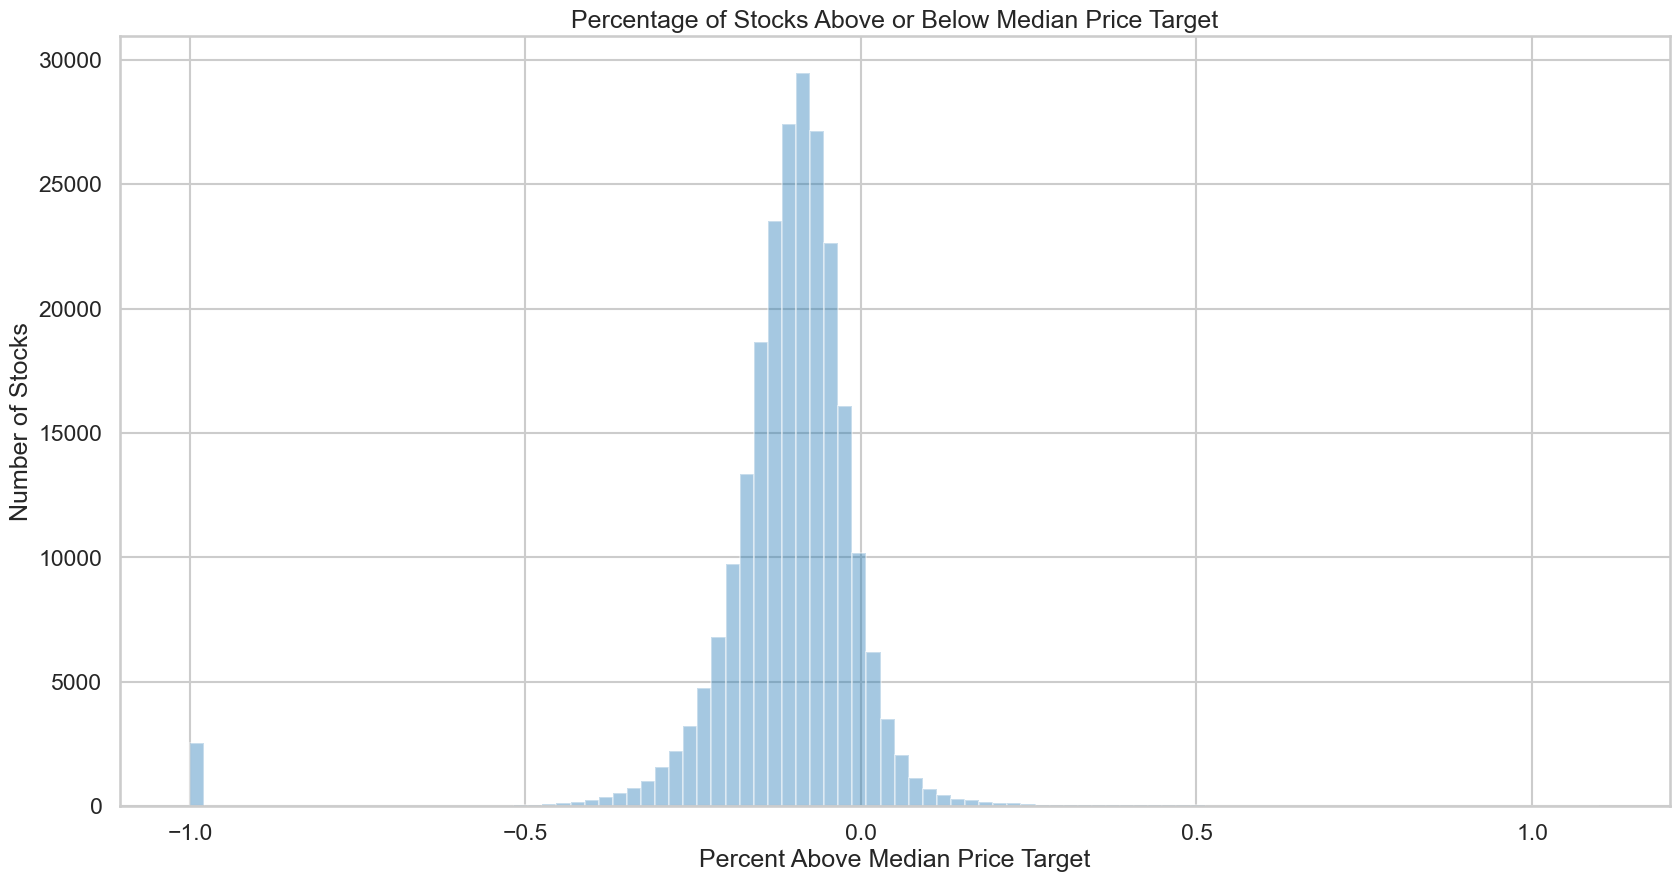

In [31]:
# plot the percentage of stocks above or below the median price target with seaborn
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(20,10))
sns.distplot(all_stock_data['percent_above_median_PT'], bins=100, kde=False)
plt.title('Percentage of Stocks Above or Below Median Price Target')
plt.xlabel('Percent Above Median Price Target')
plt.ylabel('Number of Stocks')
plt.show()

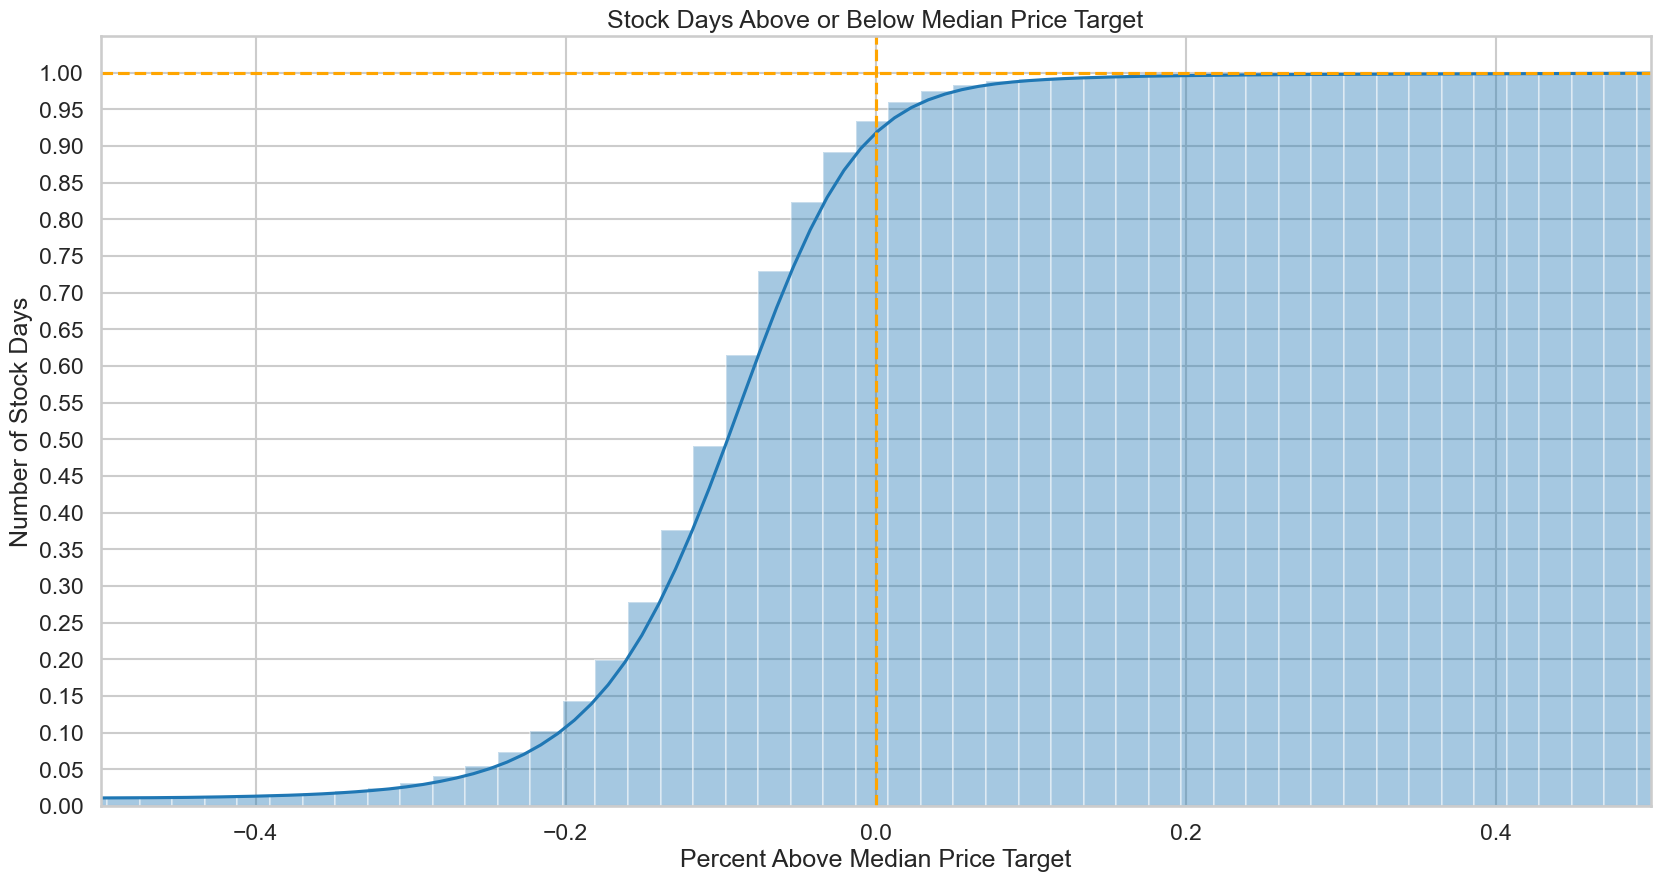

In [32]:
# get the cdf of the percent above or below median price target with seaborn
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(20,10))
sns.distplot(all_stock_data['percent_above_median_PT'], bins=100, kde=True, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))
# make y-axis a percentage of total
plt.title('Stock Days Above or Below Median Price Target')
plt.xlabel('Percent Above Median Price Target')
# add more y-axis gridlines
plt.yticks(np.arange(0, 1.05, 0.05))
#ylim and xlim at .5 and -.5
plt.xlim(-.5, .5)
# hline at 1.0
plt.axhline(y=1.0, color='orange', linestyle='--')
# vline at 0.0
plt.axvline(x=0.0, color='orange', linestyle='--')
plt.ylabel('Number of Stock Days')
plt.show()




In [33]:
# calculate percent of total stock days above the median price target
above_median = all_stock_data[all_stock_data['percent_above_median_PT'] > 0]
above_median_pct = len(above_median) / len(all_stock_data)
print(f'{above_median_pct:.2%} of stock days are above the median price target')

7.96% of stock days are above the median price target


In [34]:
# calculate percent of total stock days 10% below the median price target
below_median = all_stock_data[all_stock_data['percent_above_median_PT'] < -.1]
below_median_pct = len(below_median) / len(all_stock_data)
print(f'{below_median_pct:.2%} of stock days are 10% below the median price target')

47.23% of stock days are 10% below the median price target


In [35]:
# get median percent above median price target
median_percent_above_median = all_stock_data['percent_above_median_PT'].median()
print(f'The median percent above median price target is {median_percent_above_median:.2%}')


The median percent above median price target is -9.52%


## Modeling

In [36]:
all_stock_data.dtypes

 Date                       object
Price Target               float64
Price Target - High        float64
Price Target - Low         float64
Price Target - StdDev      float64
                            ...   
above_min                     bool
above_median                  bool
below_max                     bool
between_min_max               bool
percent_above_median_PT    float64
Length: 71, dtype: object

In [37]:
target = '1-day Future Close Change'

In [38]:
# drop all other Future columns
all_stock_data.drop(columns=['3-day Future Close Change', '2-day Future Close Change', '5-day Future Close Change', '10-day Future Close Change', '20-day Future Close Change', '30-day Future Close Change', '60-day Future Close Change'], inplace=True)

<AxesSubplot:xlabel='Count', ylabel='variable'>

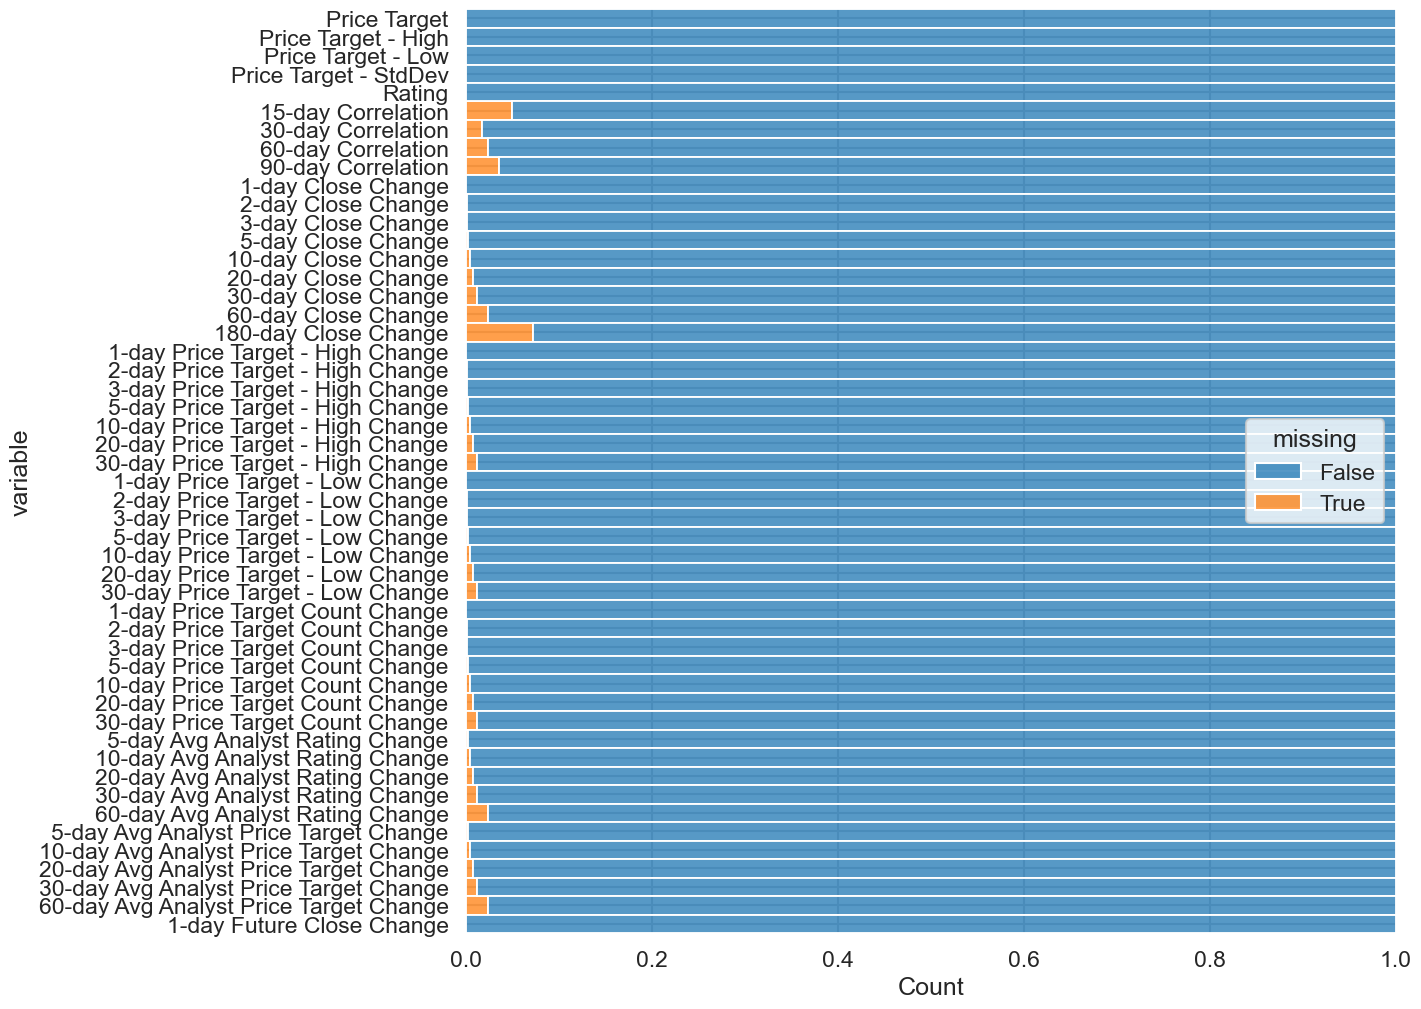

In [39]:
#Identify columns with missing values
the_df = all_stock_data
nothere = the_df.isna().sum()
nothere = pd.DataFrame(nothere)
nothere = nothere.loc[nothere[0] > 0]
cols = nothere.index

f, ax = plt.subplots(figsize = (12,12))

sns.despine(f, left=True, bottom=True)
sns.histplot(
    data = the_df[cols].isna().melt(value_name='missing'),
    y= 'variable',
    hue = 'missing',
    multiple = 'fill', ax = ax)


In [40]:
# dropna
all_stock_data.dropna(inplace=True)

In [41]:
all_stock_data.shape

(210731, 64)

In [42]:
# check value counts of target
all_stock_data[target].value_counts()

 0.000000    1155
 0.011765      10
 0.009174      10
 0.004098       9
 0.016949       9
             ... 
 0.012274       1
-0.009615       1
-0.005754       1
-0.001641       1
 0.001701       1
Name: 1-day Future Close Change, Length: 196402, dtype: int64

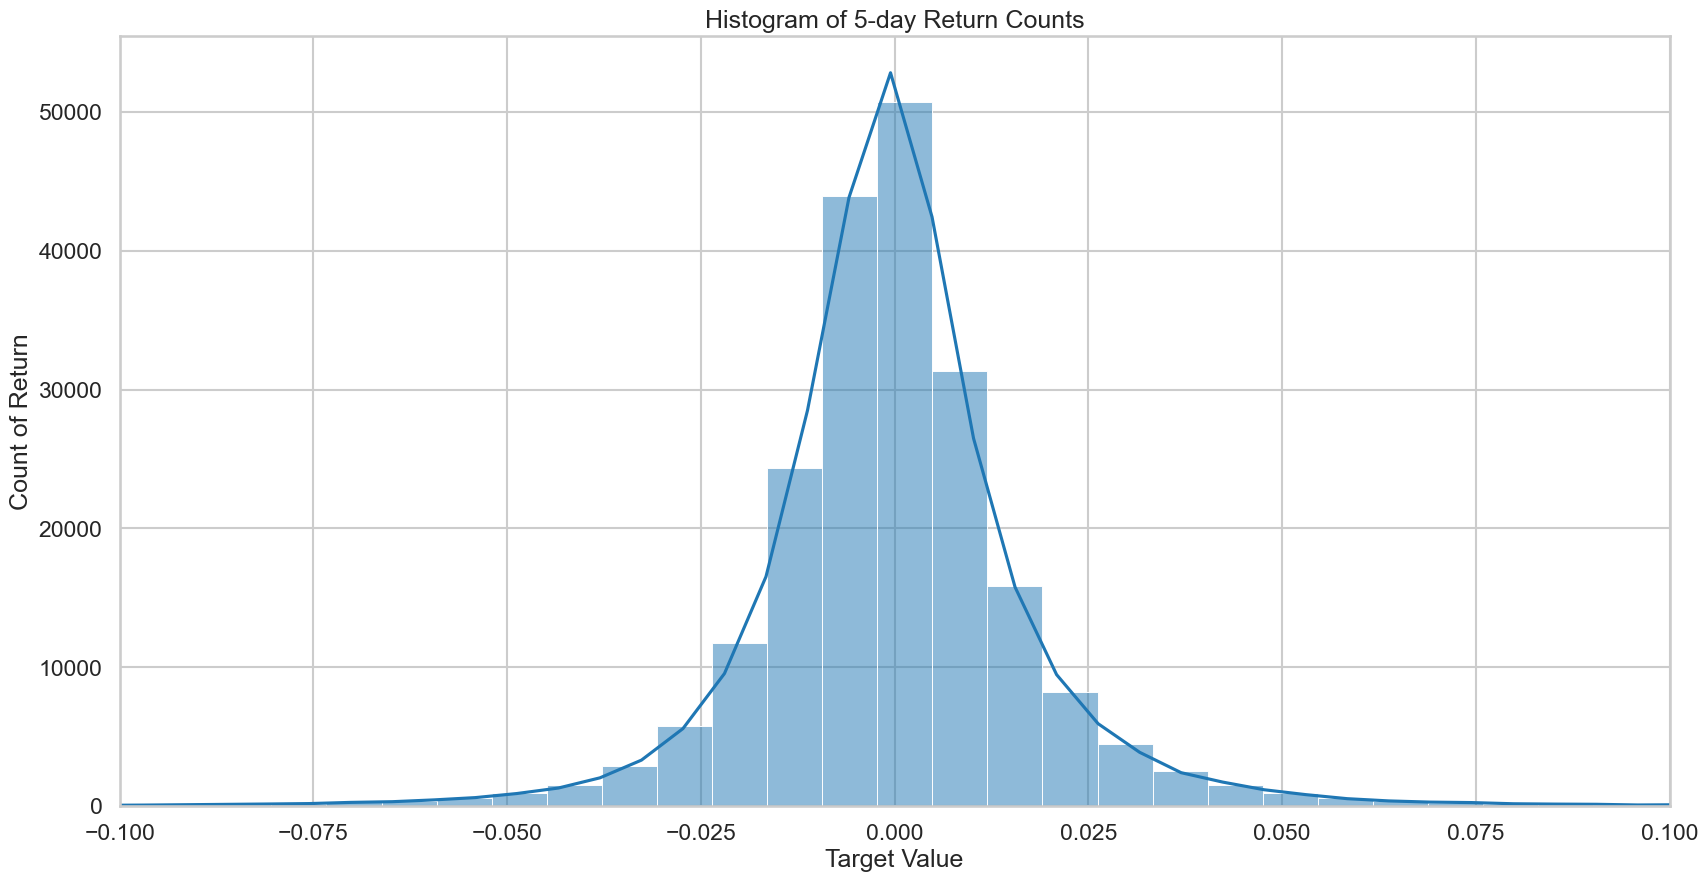

In [43]:
# plot histogram of target value counts
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(20,10))
sns.histplot(all_stock_data[target], bins=150, kde=True)
plt.title('Histogram of 5-day Return Counts')
plt.xlabel('Target Value')
plt.ylabel('Count of Return')
plt.xlim(-.1, .1)
plt.show()


In [44]:
# lets change the target variable to if the stock went up or down
all_stock_data['5-day-return-positive'] = all_stock_data[target].apply(lambda x: 1 if x > 0 else 0)

In [45]:
# drop the old target variable
all_stock_data.drop(columns=[target], inplace=True)

In [46]:
target = '5-day-return-positive'

In [47]:
all_stock_data

,Date,Price Target,Price Target - High,Price Target - Low,Price Target - StdDev,Price Target - Median,Open,Low,High,Close,...,10-day Avg Analyst Price Target Change,20-day Avg Analyst Price Target Change,30-day Avg Analyst Price Target Change,60-day Avg Analyst Price Target Change,above_min,above_median,below_max,between_min_max,percent_above_median_PT,5-day-return-positive
180,10-22-2013,19.92643,27.75,9.64286,3.05475,19.64286,16.477878,15.902691,16.541879,18.566696,...,0.000000,0.009174,0.037736,0.047619,True,False,True,True,-0.054787,0
181,10-23-2013,19.97143,27.75,9.64286,3.05178,19.64286,16.246082,16.246082,16.454870,18.748571,...,0.000000,0.009174,0.018518,0.047619,True,False,True,True,-0.045527,0
182,10-24-2013,19.98178,27.75,9.64286,3.08190,19.64286,16.433898,16.354076,16.667728,18.996785,...,0.000000,0.009174,0.018518,0.047619,True,False,True,True,-0.032891,1
183,10-25-2013,19.98178,27.75,9.64286,3.08190,19.64286,16.631573,16.437341,16.691518,18.784214,...,0.000000,0.009174,0.018518,0.047619,True,False,True,True,-0.043713,0
184,10-28-2013,19.86458,27.75,9.64286,2.90836,19.64286,16.560360,16.377866,16.621713,18.924142,...,0.000000,0.004566,0.018518,0.047619,True,False,True,True,-0.036589,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238300,01-30-2023,121.02963,140.00,98.00000,12.11717,122.00000,115.090000,113.151900,115.490000,113.560000,...,0.016667,0.042735,0.042735,0.079646,True,False,True,True,-0.069180,0
238301,01-31-2023,121.73333,142.00,98.00000,12.06587,123.40000,112.100000,110.430000,116.400000,116.010000,...,0.011475,0.028333,0.054701,0.092035,True,False,True,True,-0.059887,1
238302,02-01-2023,122.25185,142.00,98.00000,12.52998,124.00000,115.830000,113.340000,117.380000,114.740000,...,0.016393,0.033333,0.059829,0.097345,True,False,True,True,-0.074677,1
238303,02-02-2023,122.43704,142.00,98.00000,12.35368,124.00000,114.850000,109.830000,115.070000,111.150000,...,0.016393,0.033333,0.059829,0.097345,True,False,True,True,-0.103629,0


In [48]:
# check for inf
all_stock_data.replace([np.inf, -np.inf], np.nan, inplace=True)
# check for nan
all_stock_data.isna().sum()
# replace nan with median
all_stock_data.fillna(all_stock_data.median(), inplace=True)

Correlation Matrix

In [49]:
target_col = '5-day-return-positive'
data_pred = all_stock_data
cor=data_pred.corr()[target_col]
cor = pd.DataFrame(cor)
cor = cor.sort_values(by=[target_col], ascending=False)
cor


,5-day-return-positive
5-day-return-positive,1.000000
1-day Close Change,0.028348
3-day Close Change,0.021867
5-day Close Change,0.020772
2-day Close Change,0.019264
...,...
20-day Avg Analyst Rating Change,-0.005768
30-day Avg Analyst Rating Change,-0.005808
Rating,-0.005929
60-day Avg Analyst Price Target Change,-0.007242


## Assign Target and Split

In [50]:
y = all_stock_data[target]
X = all_stock_data.drop(columns=[target])

# choose scoring metric
class_metric = 'f1'

# drop columns here pre-split

# drop date column
X.drop(columns=[' Date'], inplace=True)

In [51]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

categorical_columns

['Ticker']

In [52]:
numerical_columns

['Price Target',
 'Price Target - High',
 'Price Target - Low',
 'Price Target - StdDev',
 'Price Target - Median',
 'Open',
 'Low',
 'High',
 'Close',
 'Adj. Close',
 'Rating',
 'Price Target - #',
 '15-day Correlation',
 '30-day Correlation',
 '60-day Correlation',
 '90-day Correlation',
 '1-day Close Change',
 '2-day Close Change',
 '3-day Close Change',
 '5-day Close Change',
 '10-day Close Change',
 '20-day Close Change',
 '30-day Close Change',
 '60-day Close Change',
 '180-day Close Change',
 '1-day Price Target - High Change',
 '2-day Price Target - High Change',
 '3-day Price Target - High Change',
 '5-day Price Target - High Change',
 '10-day Price Target - High Change',
 '20-day Price Target - High Change',
 '30-day Price Target - High Change',
 '1-day Price Target - Low Change',
 '2-day Price Target - Low Change',
 '3-day Price Target - Low Change',
 '5-day Price Target - Low Change',
 '10-day Price Target - Low Change',
 '20-day Price Target - Low Change',
 '30-day Price T

In [53]:
numerical_columns.remove('above_min')
numerical_columns.remove('below_max')
numerical_columns.remove('above_median')
numerical_columns.remove('between_min_max')
categorical_columns.append('above_min')
categorical_columns.append('below_max')
categorical_columns.append('above_median')
categorical_columns.append('between_min_max')

In [54]:
numerical_columns

['Price Target',
 'Price Target - High',
 'Price Target - Low',
 'Price Target - StdDev',
 'Price Target - Median',
 'Open',
 'Low',
 'High',
 'Close',
 'Adj. Close',
 'Rating',
 'Price Target - #',
 '15-day Correlation',
 '30-day Correlation',
 '60-day Correlation',
 '90-day Correlation',
 '1-day Close Change',
 '2-day Close Change',
 '3-day Close Change',
 '5-day Close Change',
 '10-day Close Change',
 '20-day Close Change',
 '30-day Close Change',
 '60-day Close Change',
 '180-day Close Change',
 '1-day Price Target - High Change',
 '2-day Price Target - High Change',
 '3-day Price Target - High Change',
 '5-day Price Target - High Change',
 '10-day Price Target - High Change',
 '20-day Price Target - High Change',
 '30-day Price Target - High Change',
 '1-day Price Target - Low Change',
 '2-day Price Target - Low Change',
 '3-day Price Target - Low Change',
 '5-day Price Target - Low Change',
 '10-day Price Target - Low Change',
 '20-day Price Target - Low Change',
 '30-day Price T

In [55]:
col_list = X.columns.to_list()

Split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [57]:
catcols = []

for col in categorical_columns:
    ind = col_list.index(col)
    catcols.append(ind)

catcols

[12, 57, 59, 58, 60]

In [58]:
cont_cols_index = [n for n in range(len(X_train.columns)) if n not in catcols]

In [59]:
# To get the column names from onehotencoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
checker = ohe.fit_transform(X_train[categorical_columns])

In [60]:
feature_names_categorical = ohe.get_feature_names(categorical_columns)

Preprocessing

In [61]:
# pipeline for categorical data
cat_preprocessing = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse=False),
)
# pipeline for numerical data
num_preprocessing = make_pipeline(StandardScaler())

# combine both pipeline using a columnTransformer
preprocessing = ColumnTransformer(
    [("num", num_preprocessing, cont_cols_index), ("cat", cat_preprocessing, catcols)]
)

preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14,
                                  15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                  26, 27, 28, 29, 30, ...]),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 [12, 57, 59, 58, 60])])

Function additions

In [62]:
def make_cf(model):
    #load pickle file
    with open(model, 'rb') as f:
        model = pickle.load(f)
    #get predictions
    y_pred = model.predict(X_test)
    cf = plot_confusion_matrix(model, y_test, y_pred)
    return cf

In [63]:
# Function creates a pipeline, runs it, cross-validates and scores for f1, and saves a pickle file

def create_fullpipe(preprocessing, model, model_name):
    fullpipe = Pipeline(steps=[('preprocess', preprocessing), ('model', model)])
    fullpipe.fit(X_train, y_train)
    # score with f1
    f1_sco = cross_val_score(fullpipe, X_train, y_train, cv=3, scoring='f1')

    # pickle model
    pickle.dump(fullpipe, open(f'models/{model_name}.pkl', 'wb'))
    return f1_sco

Run Vanilla Models

In [64]:
if 'Logistic_Regression.pkl' not in os.listdir('models'):
    f1s = create_fullpipe(preprocessing, LogisticRegression(), 'Logistic_Regression')
    print (f'F1 Score: {f1s}')
else:
    # load pickle file
    with open('models/Logistic_Regression.pkl', 'rb') as f:
        lr = pickle.load(f)
    # test the model for f1 score
    y_pred = lr.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'F1 Score: {score}')

F1 Score: 0.23106784151826978


In [65]:
if 'Random_Forest.pkl' not in os.listdir('models'):
    f1s = create_fullpipe(preprocessing, RandomForestClassifier(), 'Random_Forest')
    print (f'F1 Score: {f1s}')
else:
    # load pickle file
    with open('models/Random_Forest.pkl', 'rb') as f:
        rf = pickle.load(f)
    # test the model
    y_pred = rf.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'F1 Score: {score}')

F1 Score: 0.45030123781356124


In [66]:
if 'Decision_Tree.pkl' not in os.listdir('models'):
    f1s = create_fullpipe(preprocessing, DecisionTreeClassifier(), 'Decision_Tree')
    print (f'F1 Score: {f1s}')
else:
    # load pickle file
    with open('models/Decision_Tree.pkl', 'rb') as f:
        dt = pickle.load(f)
    # test the model
    y_pred = dt.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'F1 Score: {score}')

F1 Score: 0.48264920877178885


In [67]:
if 'Bagged_Trees.pkl' not in os.listdir('models'):
    f1s= create_fullpipe(preprocessing, BaggingClassifier(), 'Bagged_Trees')
    print (f'F1 Score: {f1s}')
else:
    # load pickle file
    with open('models/Bagged_Trees.pkl', 'rb') as f:
        bt = pickle.load(f)
    # test the model
    y_pred = bt.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'F1 Score: {score}')
    

F1 Score: 0.41364675155076724


In [68]:
if 'Extra_Trees.pkl' not in os.listdir('models'):
    f1s= create_fullpipe(preprocessing, ExtraTreesClassifier(), 'Extra_Trees')
    print (f'F1 Score: {f1s}')
else:
    # load pickle file
    with open('models/Extra_Trees.pkl', 'rb') as f:
        et = pickle.load(f)
    # test the model
    y_pred = et.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'F1 Score: {score}')

F1 Score: 0.4686218595841225


In [69]:
if 'XGBoost.pkl' not in os.listdir('models'):
    f1s= create_fullpipe(preprocessing, XGBClassifier(eval_metric = 'logloss'), 'XGBoost')
    print (f'F1 Score: {f1s}')
else:
    # load pickle file
    with open('models/XGBoost.pkl', 'rb') as f:
        xgb = pickle.load(f)
    # test the model
    y_pred = xgb.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'F1 Score: {score}')
    

F1 Score: 0.3909575769437784


In [70]:
if 'K_Nearest_Neighbors.pkl' not in os.listdir('models'):
    f1s= create_fullpipe(preprocessing, KNeighborsClassifier(), 'K_Nearest_Neighbors')
    print (f'F1 Score: {f1s}')
else:
    # load pickle file
    with open('models/K_Nearest_Neighbors.pkl', 'rb') as f:
        knn = pickle.load(f)
    # test the model
    y_pred = knn.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'F1 Score: {score}')

F1 Score: 0.46807463604675004


Logistic Regression

In [71]:
with open ('models/Logistic_Regression.pkl', 'rb') as f:
    log_reg = pickle.load(f)

In [72]:
log_reg.steps[1][1].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [73]:
if 'Logistic_Regression_GridSearch.pkl' not in os.listdir('models'):
    log_reg_grid = {'model__C': [0.001, 0.01, 0.1, 1, 10],
                    'model__penalty': ['l2'],
                    'model__solver': ['lbfgs'],
                    'model__max_iter': [100, 200],
                    'model__tol': [0.00001, 0.0001, 0.001, 0.01],
    }
                    
    log_reg_gridsearch = GridSearchCV(log_reg, log_reg_grid, cv=3, n_jobs = 16, scoring='f1', verbose = 3)
    log_reg_gridsearch.fit(X_train, y_train)
    play_jobs_done()
    # save to pickle
    pickle.dump(log_reg_gridsearch, open('models/Logistic_Regression_GridSearch.pkl', 'wb'))
    # get f1 score for best model
    y_pred = log_reg_gridsearch.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'F1 Score: {score}')

else:
    # load pickle file
    with open('models/Logistic_Regression_GridSearch.pkl', 'rb') as f:
        log_reg_gridsearch = pickle.load(f)
    # test the model
    y_pred = log_reg_gridsearch.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'F1 Score: {score}')

F1 Score: 0.22865787767451914


In [74]:
if 'Random_Forest_GridSearch.pkl' not in os.listdir('models'):
  rf_grid = {'model__n_estimators': [100, 250],
                'model__max_depth': [None, 3, 4, 6, 8,  10, 15, 20, 25],
                  'model__min_samples_split': [2],
                  'model__min_samples_leaf': [1],
                  'model__max_features': ['auto', 'sqrt', 'log2', .4, .6, .9]}

  rf_gridsearch = GridSearchCV(rf, rf_grid, cv=3, n_jobs = 16, scoring='f1', verbose = 3)
  rf_gridsearch.fit(X_train, y_train)
  play_jobs_done()
  # save to pickle
  pickle.dump(rf_gridsearch, open('models/Random_Forest_GridSearch.pkl', 'wb'))
  # get f1 score for best model
  y_pred = rf_gridsearch.predict(X_test)
  score = f1_score(y_test, y_pred)
  print(f'Random Forest Grid1 F1 Score: {score}')

else:
  # load pickle file
  with open('models/Random_Forest_GridSearch.pkl', 'rb') as f:
      rf_gridsearch = pickle.load(f)
  # test the model
  y_pred = rf_gridsearch.predict(X_test)
  score = f1_score(y_test, y_pred)
  print(f'Random Forest Grid1 F1 Score: {score}')


Random Forest Grid1 F1 Score: 0.45333506808916646


Decision Tree

In [104]:
# get decision tree keys
# get dt params
dt_params = dt.steps[1][1].get_params()
# get dt keys
dt_params

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [76]:
dt_grid = {'model__criterion': ['gini', 'entropy'],
            'model__max_depth': [None, 3, 4, 6, 8,  10, 15, 20, 25, 30, 35, 40, 45, 50],
            'model__min_samples_split': [2, 3],
            'model__min_samples_leaf': [1, 2],
            'model__max_features': ['auto', 'sqrt', 'log2', .4, .6, .9, 1]}

if 'Decision_Tree_GridSearch.pkl' not in os.listdir('models'):
    dt_gridsearch = GridSearchCV(dt, dt_grid, cv=3, n_jobs = 16, scoring='f1', verbose = 3)
    dt_gridsearch.fit(X_train, y_train)
    play_jobs_done()
    # save to pickle
    pickle.dump(dt_gridsearch, open('models/Decision_Tree_GridSearch.pkl', 'wb'))
    # get f1 score for best model
    y_pred = dt_gridsearch.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'Decision Tree Grid1 F1 Score: {score}')

else:
    # load pickle file
    with open('models/Decision_Tree_GridSearch.pkl', 'rb') as f:
        dt_gridsearch = pickle.load(f)
    # test the model
    y_pred = dt_gridsearch.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'Decision Tree Grid1 F1 Score: {score}')

Decision Tree Grid1 F1 Score: 0.4777009733782068


In [77]:
# get best params
dt_gridsearch.best_params_

{'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': 0.9,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2}

In [109]:
# Decision tree grid 2
dt_grid2 = {'model__criterion': ['gini'],
            'model__max_depth': [None],
            'model__min_samples_split': [2],
            'model__min_samples_leaf': [1],
            'model__max_features': ['auto', 'sqrt', None],
            'model__max_leaf_nodes': [None],
            'model__min_impurity_decrease': [0.0, 0.1, 0.2, 0.3],
            'model__min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3]}

if 'Decision_Tree_GridSearch2.pkl' not in os.listdir('models'):
    dt_gridsearch2 = GridSearchCV(dt, dt_grid2, cv=3, n_jobs = 16, scoring='f1', verbose = 3)
    dt_gridsearch2.fit(X_train, y_train)
    play_jobs_done()
    # save to pickle
    pickle.dump(dt_gridsearch2, open('models/Decision_Tree_GridSearch2.pkl', 'wb'))
    # get f1 score for best model
    y_pred = dt_gridsearch2.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'Decision Tree Grid2 F1 Score: {score}')

else:
    # load pickle file
    with open('models/Decision_Tree_GridSearch2.pkl', 'rb') as f:
        dt_gridsearch2 = pickle.load(f)
    # test the model
    y_pred = dt_gridsearch2.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'Decision Tree Grid2 F1 Score: {score}')


Decision Tree Grid2 F1 Score: 0.4887790489097939


In [110]:
# best params
dt_gridsearch2.best_params_

{'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0}

Bagged Trees

In [78]:
bt.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocess', 'model', 'preprocess__n_jobs', 'preprocess__remainder', 'preprocess__sparse_threshold', 'preprocess__transformer_weights', 'preprocess__transformers', 'preprocess__verbose', 'preprocess__verbose_feature_names_out', 'preprocess__num', 'preprocess__cat', 'preprocess__num__memory', 'preprocess__num__steps', 'preprocess__num__verbose', 'preprocess__num__standardscaler', 'preprocess__num__standardscaler__copy', 'preprocess__num__standardscaler__with_mean', 'preprocess__num__standardscaler__with_std', 'preprocess__cat__memory', 'preprocess__cat__steps', 'preprocess__cat__verbose', 'preprocess__cat__onehotencoder', 'preprocess__cat__onehotencoder__categories', 'preprocess__cat__onehotencoder__drop', 'preprocess__cat__onehotencoder__dtype', 'preprocess__cat__onehotencoder__handle_unknown', 'preprocess__cat__onehotencoder__sparse', 'model__base_estimator', 'model__bootstrap', 'model__bootstrap_features', 'model__max_features', 'model__max_s

In [79]:
bt_grid= {'model__max_features': [4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50],
            'model__n_estimators': [100, 250, 500]}

if 'Bagging_Tree_GridSearch.pkl' not in os.listdir('models'):
    bt_gridsearch = GridSearchCV(bt, bt_grid, cv=3, n_jobs = 16, scoring='f1', verbose = 3)
    bt_gridsearch.fit(X_train, y_train)
    play_jobs_done()
    # save to pickle
    pickle.dump(bt_gridsearch, open('models/Bagging_Tree_GridSearch.pkl', 'wb'))
    # get f1 score for best model
    y_pred = bt_gridsearch.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'Bagging Tree Grid1 F1 Score: {score}')

else:
    # load pickle file
    with open('models/Bagging_Tree_GridSearch.pkl', 'rb') as f:
        bt_gridsearch = pickle.load(f)
    # test the model
    y_pred = bt_gridsearch.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'Bagging Tree Grid1 F1 Score: {score}')

Bagging Tree Grid1 F1 Score: 0.43643956043956045


Extra Trees

In [80]:
et_grid = {'model__n_estimators': [50, 100, 500],
            'model__max_depth': [None, 3, 4, 6, 8,  10, 15, 20, 25, 30],
            'model__min_samples_split': [2],
            'model__min_samples_leaf': [1],
            'model__max_features': ['auto', 'sqrt', 'log2', .5]}

if 'Extra_Trees_GridSearch.pkl' not in os.listdir('models'):
    et_gridsearch = GridSearchCV(et, et_grid, cv=3, n_jobs = 16, scoring='f1', verbose = 3)
    et_gridsearch.fit(X_train, y_train)
    play_jobs_done()
    # save to pickle
    pickle.dump(et_gridsearch, open('models/Extra_Trees_GridSearch.pkl', 'wb'))
    # get f1 score for best model
    y_pred = et_gridsearch.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'Extra Trees Grid1 F1 Score: {score}')

else:
    # load pickle file
    with open('models/Extra_Trees_GridSearch.pkl', 'rb') as f:
        et_gridsearch = pickle.load(f)
    # test the model
    y_pred = et_gridsearch.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'Extra Trees Grid1 F1 Score: {score}')

Extra Trees Grid1 F1 Score: 0.47313866507305213


XGBoost

In [81]:
xg_grid = {'model__n_estimators': [50, 100],
            'model__max_depth': [None, 3, 4, 6, 8,  10, 15, ],
            'model__min_samples_split': [2],
            'model__min_samples_leaf': [1],
            'model__max_features': ['auto', 'sqrt', 'log2', .5]}
if 'XGBoost_GridSearch.pkl' not in os.listdir('models'):
    xg_gridsearch = GridSearchCV(xgb, xg_grid, cv=3, n_jobs = 8, scoring='f1', verbose = 3)
    xg_gridsearch.fit(X_train, y_train)
    play_jobs_done()
    # save to pickle
    pickle.dump(xg_gridsearch, open('models/XGBoost_GridSearch.pkl', 'wb'))
    # get f1 score for best model
    y_pred = xg_gridsearch.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'XGBoost Grid1 F1 Score: {score}')

else:
    # load pickle file
    with open('models/XGBoost_GridSearch.pkl', 'rb') as f:
        xg_gridsearch = pickle.load(f)
    # test the model
    y_pred = xg_gridsearch.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'XGBoost Grid1 F1 Score: {score}')
    

XGBoost Grid1 F1 Score: 0.4757427604362542


In [82]:
# get best params
xg_gridsearch.best_params_

{'model__max_depth': 15,
 'model__max_features': 'auto',
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 100}

XGBoost Grid 2

In [83]:
xg_grid = {'model__n_estimators': [50, 100, 250, 500],
            'model__max_depth': [None, 3, 4, 6, 8,  10, 15, 20],
            'model__min_samples_split': [2],
            'model__min_samples_leaf': [1],
            'model__max_features': ['auto', 'sqrt', 'log2', .5, .7]}

if 'XGBoost_GridSearch2.pkl' not in os.listdir('models'):
    xg_gridsearch2 = GridSearchCV(xgb, xg_grid, cv=3, n_jobs = 8, scoring='f1', verbose = 3)
    xg_gridsearch2.fit(X_train, y_train)
    play_jobs_done()
    # save to pickle
    pickle.dump(xg_gridsearch2, open('models/XGBoost_GridSearch2.pkl', 'wb'))
    # get f1 score for best model
    y_pred = xg_gridsearch2.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'XGBoost Grid2 F1 Score: {score}')

else:
    # load pickle file
    with open('models/XGBoost_GridSearch2.pkl', 'rb') as f:
        xg_gridsearch2 = pickle.load(f)
    # test the model
    y_pred = xg_gridsearch2.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'XGBoost Grid2 F1 Score: {score}')

Fitting 3 folds for each of 160 candidates, totalling 480 fits
[11:32:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


XGBoost Grid2 F1 Score: 0.4866401839849467


In [88]:
xg_gridsearch2.best_params_

{'model__max_depth': 20,
 'model__max_features': 'auto',
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 500}

Because the model max depth and max features achieve the greatest F1 score at their respective max values, I want to increase these max values and see if the F1 score increases.

In [89]:
xg_grid3 = {'model__n_estimators': [500, 1000, 1500],
            'model__max_depth': [None, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100],
            'model__min_samples_split': [2],
            'model__min_samples_leaf': [1],
            'model__max_features': ['auto']}

if 'XGBoost_GridSearch3.pkl' not in os.listdir('models'):
    xg_gridsearch3 = GridSearchCV(xgb, xg_grid3, cv=3, n_jobs = 8, scoring='f1', verbose = 3)
    xg_gridsearch3.fit(X_train, y_train)
    play_jobs_done()
    # save to pickle
    pickle.dump(xg_gridsearch3, open('models/XGBoost_GridSearch3.pkl', 'wb'))
    # get f1 score for best model
    y_pred = xg_gridsearch3.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'XGBoost Grid3 F1 Score: {score}')

else:
    # load pickle file
    with open('models/XGBoost_GridSearch3.pkl', 'rb') as f:
        xg_gridsearch3 = pickle.load(f)
    # test the model
    y_pred = xg_gridsearch3.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'XGBoost Grid3 F1 Score: {score}')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[16:07:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


XGBoost Grid3 F1 Score: 0.49897596656217347


In [111]:
#best params
xg_gridsearch3.best_params_

{'model__max_depth': 50,
 'model__max_features': 'auto',
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 1500}

In [90]:
cat_list= list(feature_names_categorical)

In [91]:
all_cats = cat_list + numerical_columns

In [93]:
# get feature importance from xg_gridsearch3
xg_gridsearch3.best_estimator_.named_steps['model'].feature_importances_

array([0.0052889 , 0.00397326, 0.0039479 , 0.00373585, 0.00360438,
       0.00472673, 0.00286291, 0.00244217, 0.00333977, 0.00185211,
       0.00355571, 0.00382191, 0.00342575, 0.00344195, 0.00343254,
       0.00345872, 0.00353827, 0.00345663, 0.00340192, 0.00333512,
       0.00332124, 0.00337438, 0.0033785 , 0.00341316, 0.00343178,
       0.00519929, 0.00519749, 0.00464277, 0.00496465, 0.00479679,
       0.00459601, 0.00419729, 0.00367668, 0.00369782, 0.00459566,
       0.00544458, 0.0054513 , 0.00487494, 0.00430057, 0.00422201,
       0.00507812, 0.00653382, 0.00614406, 0.00561476, 0.00474528,
       0.00436209, 0.00512353, 0.00444138, 0.0037667 , 0.00357534,
       0.00348249, 0.0044643 , 0.00405087, 0.00373768, 0.00370042,
       0.0037077 , 0.00345405, 0.01350417, 0.00993024, 0.00779901,
       0.00578139, 0.00603961, 0.01625346, 0.007814  , 0.00643323,
       0.00818371, 0.00958771, 0.01062673, 0.00781148, 0.00168398,
       0.00519853, 0.00730194, 0.        , 0.00486254, 0.01006

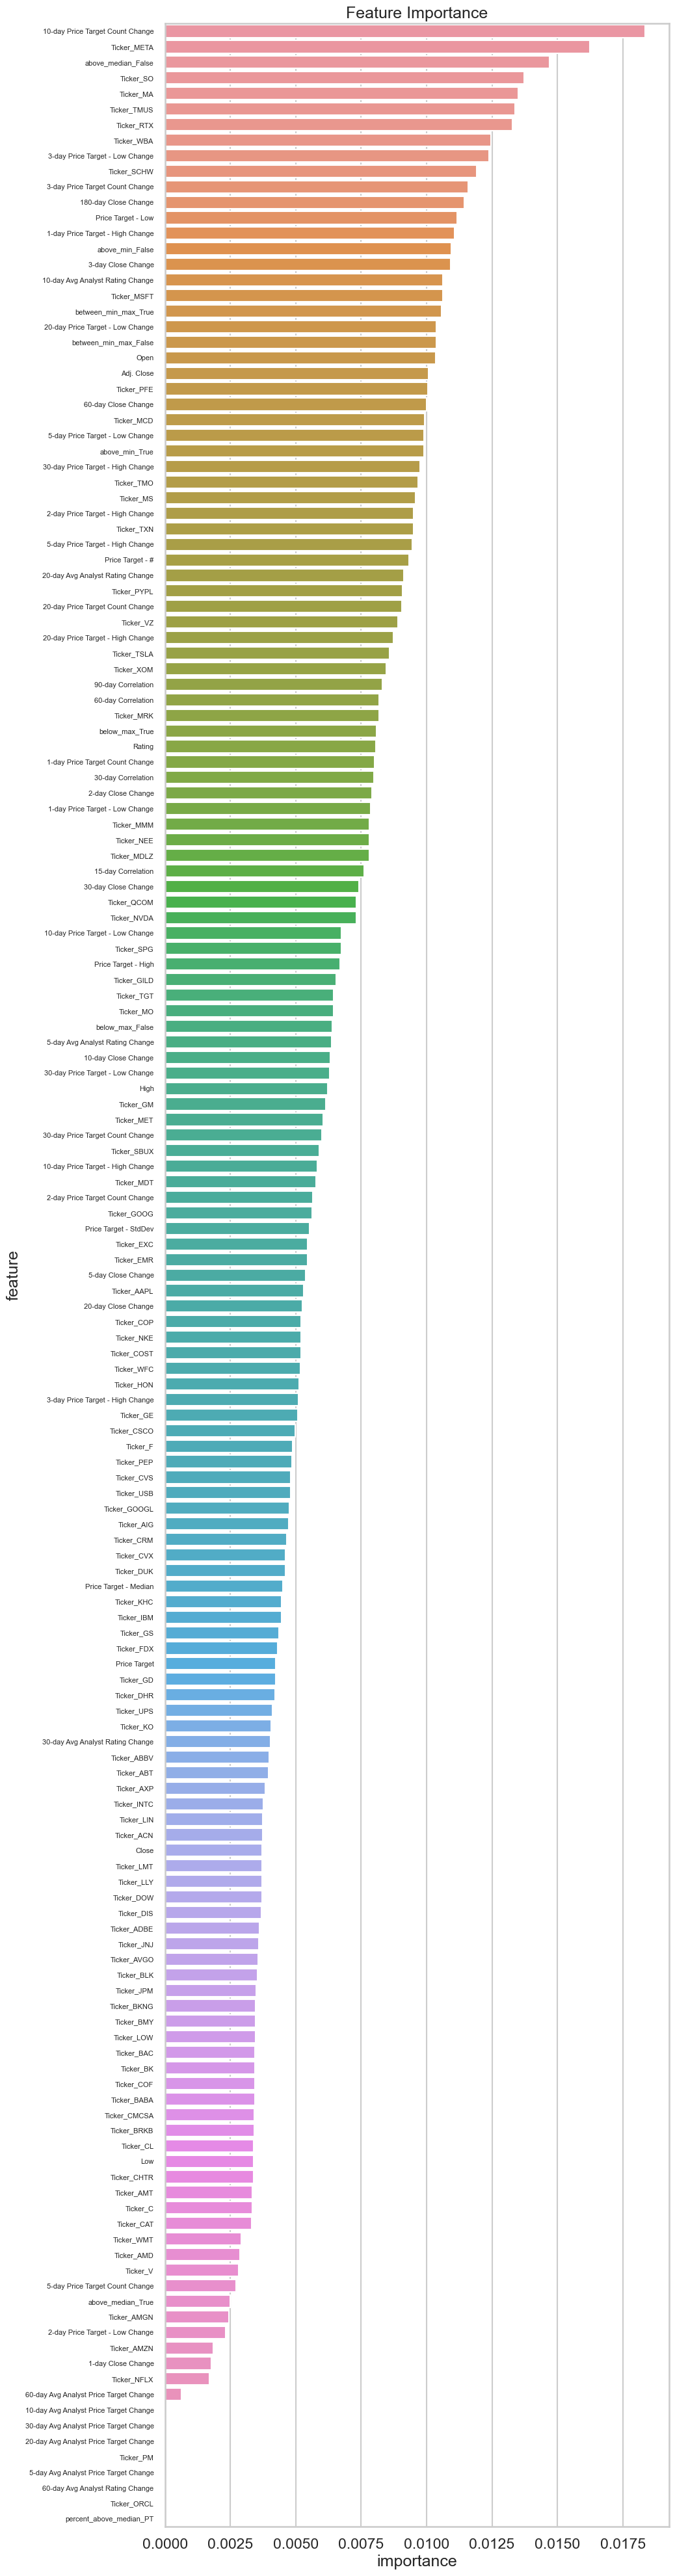

In [98]:
# add names to feature importance
feature_importance = pd.DataFrame({'feature': all_cats, 'importance': xg_gridsearch3.best_estimator_.named_steps['model'].feature_importances_})

# sort by importance
feature_importance.sort_values('importance', ascending=False, inplace=True)

# plot feature importance
plt.figure(figsize=(10, 50))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
# make y axis labels smaller
plt.yticks(fontsize=8)
plt.show()

In [99]:
# check importance when ignoring Ticker features
feature_importance[feature_importance['feature'].str.contains('Ticker') == False].sort_values('importance', ascending=False)


,feature,importance
147,10-day Price Target Count Change,0.018356
100,above_median_False,0.014698
138,3-day Price Target - Low Change,0.012383
145,3-day Price Target Count Change,0.011599
128,180-day Close Change,0.011442
...,...,...
158,30-day Avg Analyst Price Target Change,0.000000
157,20-day Avg Analyst Price Target Change,0.000000
155,5-day Avg Analyst Price Target Change,0.000000
154,60-day Avg Analyst Rating Change,0.000000


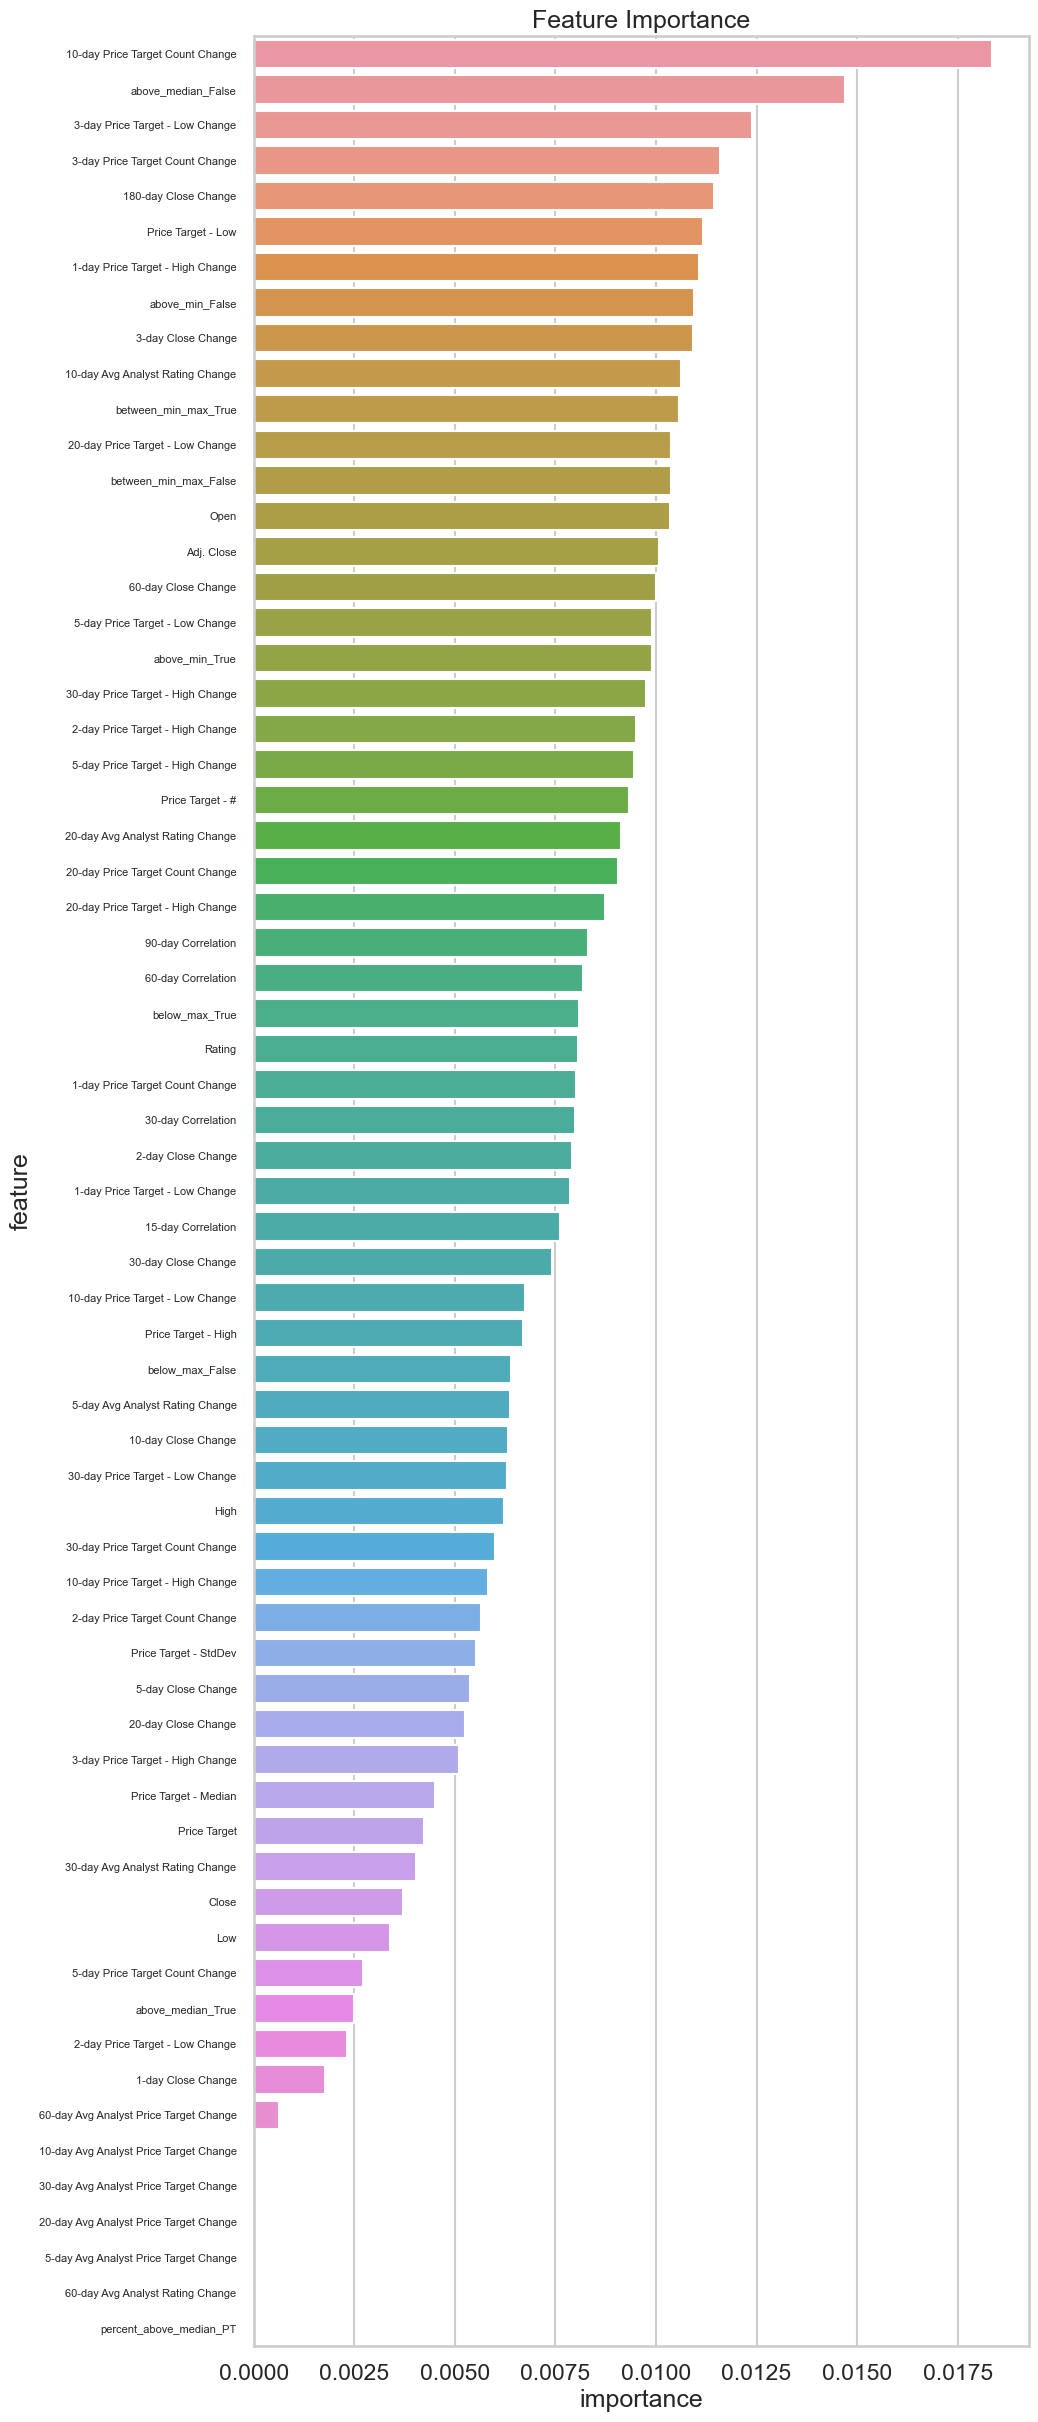

In [100]:
# plot feature importance
plt.figure(figsize=(10, 30))
sns.barplot(x='importance', y='feature', data=feature_importance[feature_importance['feature'].str.contains('Ticker') == False].sort_values('importance', ascending=False))
plt.title('Feature Importance')
# make y axis labels smaller
plt.yticks(fontsize=8)
plt.show()


## Conclusion

The best performing model achieved an F1 score of .50 (rounded). It was an XGBoost model which was gridsearched with the following optimal parameters:
- Max Depth of 50
- Max Features of 'auto'
- Min Samples Leaf of 1
- Min Samples Split of 2
- Number of Estimators of 1500

The most important features to the model include:
- The 10-day price target (average) change. This is the average price target over all of the analysts for the stock, and the change in that average price target over the last 10 days.
- Above median = False. This is a boolean feature which indicates if the stock price is above the median price of its price targets.
- The 3-day price target (low) change. This is the lowest price target over all of the analysts for the stock, and the change in that lowest price target over the last 3 days.
- The 3-day price target count change. This is the number of price targets over all of the analysts for the stock, and the change in that number of price targets over the last 3 days. This indicates when analysts are adding or removing price targets for the stock.
- 180-day close change. This is the change in the stock price over the last 180 days.
- Price target - low. This is the current low price target for the stock. 
- 1-day Price Target - High Change. This is the change in the highest price target over all of the analysts for the stock over the last 1 day.
- Above min = False. This is a boolean feature which indicates if the stock price is above the lowest price of its price targets.
- 3-day close change. This is the change in the stock price over the last 3 days.
- 10-day average analyst rating change. This is the average analyst rating over all of the analysts for the stock, and the change in that average analyst rating over the last 10 days.


## Future Work
This is the first iteration of the model, and has lots of improvements to be made, including:
- Adding more features
    - Rate features
    - Company data
    - Sector data
    - Industry data
    - Earnings data
- Expanded EDA
- Streamlit Application for deployment
- More model iterations
- Solving the model based only on SINGLE stock data, not all stocks. How would this change things?
- Solving the model based on a single sector, or industry. How would this change things?
- Outlier removal (for instance, I know from experience that the analyst ratings for Tesla and the correlation between analyst ratings and stock price are not representative of the rest of the market. How would removing these outliers change the model?)
- Adding more stocks. This was just with the SP100. What about the SP500? The Nasdaq?


